### Numerical Differentiation

1. Write a function my_der_calc(f, a, b, N, option), with the output as  [𝑑𝑓,𝑋] , where  𝑓  is a function object,  𝑎  and  𝑏  are scalars such that a < b,  𝑁  is an integer bigger than 10, and  𝑜𝑝𝑡𝑖𝑜𝑛  is the string  𝑓𝑜𝑟𝑤𝑎𝑟𝑑 ,  𝑏𝑎𝑐𝑘𝑤𝑎𝑟𝑑 , or  𝑐𝑒𝑛𝑡𝑟𝑎𝑙 . Let  𝑥  be an array starting at  𝑎 , ending at  𝑏 , containing  𝑁  evenly spaced elements, and let  𝑦  be the array  𝑓(𝑥) . The output argument,  𝑑𝑓 , should be the numerical derivatives computed for  𝑥  and  𝑦  according to the method defined by the input argument,  𝑜𝑝𝑡𝑖𝑜𝑛 . The output argument  𝑋  should be an array the same size as  𝑑𝑓 containing the points in  𝑥  for which  𝑑𝑓  is valid. Specifically, the forward difference method "loses" the last point, the backward difference method loses the first point, and the central difference method loses the first and last points.

In [ ]:
import numpy as np
import sys
import matplotlib.pyplot as plt
plt.style.use('seaborn-poster')

In [ ]:
#определяем функцию
def my_der_calc(f, a, b, N, option):
  x = np.linspace(a,b,N)
#linspace возвращает равномерно распределенные числа от a до b
  h = (b-a)/(N-1)
# h это шаг
  if option == 'central':
    df = np.zeros(N-2)
# создаем массив с нулями длиной N-2
    df[1:N-1] = (f(x[2:N]) - f(x[0:N-2]))/2/h
    x = np.linspace(a,b,N-2)
  elif option == 'backward':
    df = np.zeros(N-1)
    df[1:N] = (f(x[1:N]) - f(x[0:N-1]))/h
    x = np.linspace(a,b,N-1)
  elif option == 'forward':
    df = np.zeros(N-1)
    df[0:N-1] = (f(x[1:N]) - f(x[0:N-1]))/h
    x = np.linspace(a,b,N-1)
  return [df,x]

2. Write a function my_num_diff(f, a, b, n, option), with the output as  [𝑑𝑓,𝑋] , where  𝑓  is a function object. The function 𝑚𝑦_𝑛𝑢𝑚_𝑑𝑖𝑓𝑓  should compute the derivative of  𝑓  numerical for  𝑛  evenly spaced points starting at  𝑎  and ending at  𝑏  according to the method defined by  𝑜𝑝𝑡𝑖𝑜𝑛 . The input argument  𝑜𝑝𝑡𝑖𝑜𝑛  is one of the following strings: 'forward', 'backward', 'central'. Note that for the forward and backward method, the output argument,  𝑑𝑦 , should be  (𝑛−1)  1D array, and for the central difference method  𝑑𝑦  should be  (𝑛−2)  1D array. The function should also output a vector  𝑋  that is the same size as  𝑑𝑦  and denotes the x-values for which  𝑑𝑦  is valid.

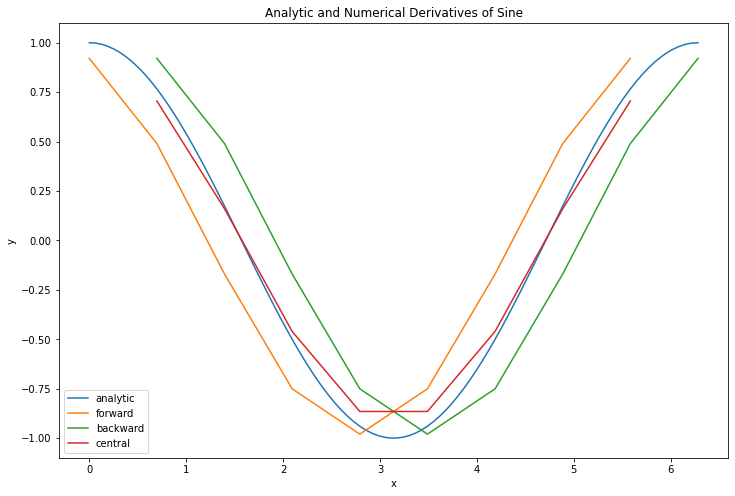

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def my_num_diff(f , a , b , N , option):
  x = np.linspace(a,b,N)
  h = (b-a)/(N-1)
  if option == 'forward':
    df = np.zeros(N-1)
    df[0:N-1] = (f(x[1:N]) - f(x[0:N-1]))/h
    x = np.linspace(a,b - h,N-1)
  elif option == 'backward':
    df = np.zeros(N-1)
    df[0:N-1] = (f(x[1:N]) - f(x[0:N-1]))/h
    x = np.linspace(a+h,b,N-1)
  elif option == 'central':
    df = np.zeros(N-2)
    df[0:N-2] = (f(x[2:N]) - f(x[0:N-2]))/2/h
    x = np.linspace(a+h,b-h,N-2)
  return [df,x]



x = np.linspace(0, 2*np.pi, 100)
f = lambda x: np.sin(x)
[dyf, Xf] = my_num_diff(f, 0, 2*np.pi, 10, 'forward')
[dyb, Xb] = my_num_diff(f, 0, 2*np.pi, 10, 'backward')
[dyc, Xc] = my_num_diff(f, 0, 2*np.pi, 10, 'central')
plt.figure(figsize = (12, 8))
plt.plot(x, np.cos(x), label = 'analytic')
plt.plot(Xf, dyf, label = 'forward')
plt.plot(Xb, dyb, label = 'backward')
plt.plot(Xc, dyc, label = 'central')
plt.legend()
plt.title('Analytic and Numerical Derivatives of Sine')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

### Numerical Integration


1. Write a function  𝑚𝑦_𝑖𝑛𝑡_𝑐𝑎𝑙𝑐(𝑓,𝑓0,𝑎,𝑏,𝑁,𝑜𝑝𝑡𝑖𝑜𝑛) , where  𝑓  is a function object,  𝑎  and  𝑏  are scalars such that a < b,  𝑁  is a positive integer, and  𝑜𝑝𝑡𝑖𝑜𝑛  is the string 'rect', 'trap', or 'simp'. Let  𝑥  be an array starting at  𝑎 , ending at  𝑏 , containing  𝑁  evenly spaced elements. The output argument,  𝐼 , should be an approximation to the integral of  𝑓(𝑥) , with initial condition  𝑓0 , computed according to the input argument,  𝑜𝑝𝑡𝑖𝑜𝑛 .

In [ ]:
import numpy as np
def my_int_calc(f, a, b, N, option):
  x = np.linspace(a,b,N)
  h = (b-a)/(N-1)
  if option == 'rect' :
    I = h * sum(f((x[:N-1] + x[1:])/2))
  elif option == 'trap':
    I = (h/2)*(f(x[0]) + 2 * sum(f(x[1:N-1])) + f(x[N-1]))
  elif option == 'simp':
    I = (h/3) * (f(x[0]) + 2*sum(f(x[:N-2:2])) + 4*sum(f(x[1:N-1:2])) + f(x[N-1]))
  return I
a = float(input("Input a: " ))
b = float(input("Input b: " ))
N = int(input("Input N: " ))
x = np.linspace(a , b , N)
f = lambda x: np.exp(x)
Ir = my_int_calc(f , a , b , N , 'rect')
It = my_int_calc(f , a , b , N , 'trap')
Is = my_int_calc(f , a , b , N , 'simp')
print('Analytic: 2')
print('Rectangles: %f' %Ir)
print('Trapetion: %f' %It)
print('Simpson: %f' %Is)

Input a: 1
Input b: 10
Input N: 100
Analytic: 2
Rectangles: 22016.165406
Trapetion: 22038.913294
Simpson: 20167.838329


2. Write a function  𝑚𝑦_𝑝𝑜𝑙𝑦_𝑖𝑛𝑡(𝑥,𝑦) , where  𝑥  and  𝑦  are one-dimensional arrays of the same size, and the elements of  𝑥  are unique and in ascending order. The function  𝑚𝑦_𝑝𝑜𝑙𝑦_𝑖𝑛𝑡  should (1) compute the Lagrange polynomial going through all the points defined by  𝑥 and  𝑦  and (2) return an approximation to the area under the curve defined by  𝑥  and  𝑦 ,  𝐼 , defined as the analytic integral of the Lagrange interpolating polynomial.

In [ ]:
from scipy.interpolate import lagrange
from scipy.integrate import trapz
def my_poly_int(x,y ):
  f = lagrange(x, y)
  I_trapz = trapz(f,x)
  return I_trapz , f

x = [1, 2, 3, 4, 5, 6, 7, 8, 9]
y = [1, 2, 3, 4, 5, 6, 7, 8, 9]
I , f = my_poly_int(x, y)
print("Integral:" , I)
print("Lagrange:" , f)

Integral: 0.9999999999997373
Lagrange:             8             7             6             5             4
-2.277e-18 x + 1.249e-16 x - 1.193e-15 x + 4.885e-15 x - 4.086e-14 x
              3             2
 + 4.103e-13 x - 4.015e-13 x + 1 x - 1.421e-13
